# Exercise: Polynomial Regression and Hyperparameters



Briefly explain polynomial regression + Compare hypotesis using regular linear regression with Polynomial regression to illustrate why we need the latter

What are hyperparemeters.

what we are doing in this Exercise

Mention metrics




## Preparing data
Explain the dataset we are using (should plot something similar to an exponential curve)



                             Account ID  Account Age  Total Accrued
0  106440e8-775d-4357-8485-d3923036b6c1           48          41239
1  b2c6c687-9c1a-4171-86d2-3ccf3759931d           12            920
2  db5f9ba8-0b3c-4fed-87fd-665bb273cbda           43          27851
3  73aa1fe8-dece-4aa5-a763-ddee06ef5aab           25           4304
4  213b5e44-60ce-447a-b7c3-12b465828af8           31          12805 



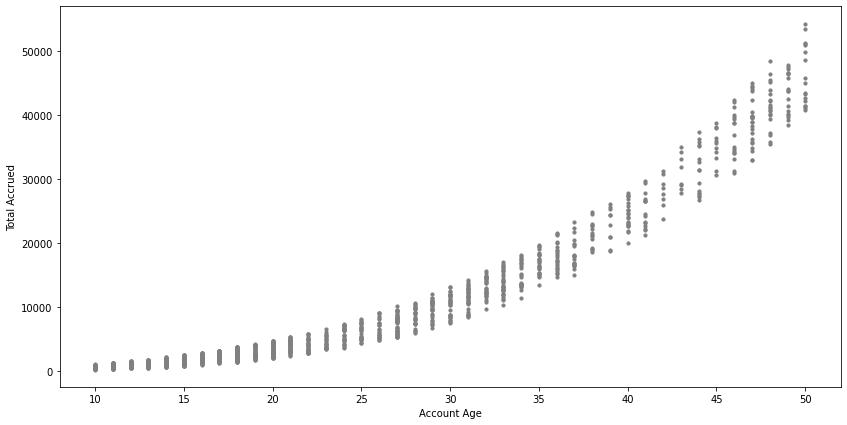

In [329]:
# Import everything we will need for this unit
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


# Load data from our dataset file into a pandas dataframe
dataset = pd.read_csv('Data/investments.csv', index_col=False, sep=",",header=0)

# Check what's in the dataset
print(dataset.head(), "\n")

# Plot dataset points
%matplotlib inline
X = dataset["Account Age"]
y = dataset["Total Accrued"]

f = plt.figure()
f.set_figwidth(14)
f.set_figheight(7)
plt.scatter(X, y, s=10, color="gray")
plt.ylabel('Total Accrued')
plt.xlabel("Account Age")
plt.show()

Explain the dataset above...why it's a curve and why the scatter?

## Polynomial Regression
- Show formula?
- Use Sklearn polynomial + linear to train/test



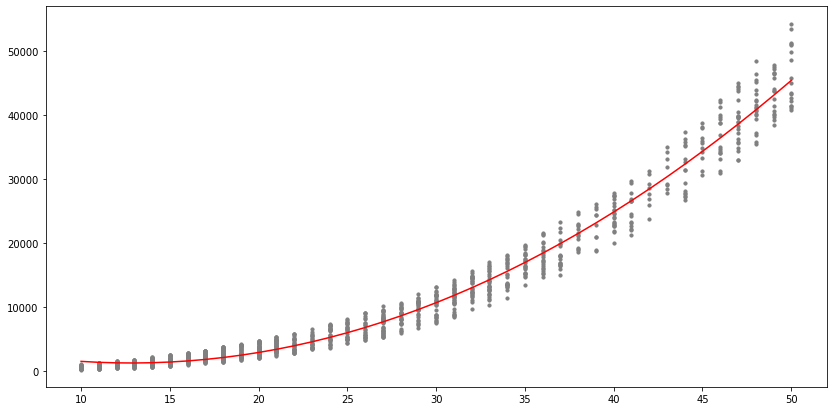

In [330]:
# X and y have to be two-domentional matrices
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

# Create a matrix of polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
y_hat = model.predict(X_poly)

# Plot hypothesis over datapoints
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(7)
plt.scatter(X, y, s=10, color="gray")
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_hat), key=sort_axis)
X, y_hat = zip(*sorted_zip)
plt.plot(X, y_hat, color="red")
plt.show()




Conclusion for the plot above

## Metrics
Use metrics such as RMSE/R2/Accuracy to evaluate the model

In [331]:
# metrics
rmse = np.sqrt(mean_squared_error(y,y_hat))
r2 = r2_score(y,y_hat)
print(rmse)
print(r2)

18092.197609734863
-1.2435126017065086


## Hyperparameters
- Briefly explain LR and num of iterations and tradeofs (when using gradient descent)
- Build a custom Class LinearRegressionWithGD that accepts hyperparams (explain why we have to) (sklearn does it automatically for us)
- Train model with a different number of iterations, ploting cost X iteration (use something too low, too high and something optimal)
- Gather metricts for best model, compare with the previous

- Animations showing the effects of learning rate on taining time go on next Unit

In [332]:
# Custom Linear Regression Implementation

class LinearRegressionUsingGradientDescent():
    """
    This alows us to change some hyperparams
    """
    # def __init__(self, lr=0.04, epochs=1000):
    #     self.lr = lr
    #     self.epochs = epochs

    def hypothesis(self, X, theta):
        y_hat = theta*X
        return np.sum(y_hat, axis=1)

    def cost(self, X, y, theta):
        m = len(X)
        y_hat = self.hypothesis(X, theta)
        return sum(np.sqrt((y_hat-y)**2))/(2*m)

    def gradientDescent(self, X, y, theta, lr, epochs):
        J=[]
        k=0
        m = len(X)
        X = X/X.max()  # Normalize X
        while k < epochs:
            y_hat = self.hypothesis(X, theta)
            for c in range(0, len(X.columns)):
                theta[c] = theta[c] - lr * sum((y_hat-y) * X.iloc[:, c])/m
            j = self.cost(X, y, theta)
            J.append(j)
            k += 1
        return J, j, theta

    def fit(self, X, y, lr=0.04, epochs=1000):
        # initialize weights
        theta = np.array([0.0]*len(X.columns))
        J, j, theta = self.gradientDescent(X, y, theta, lr, epochs)
        self.J = J
        self.theta = theta
        return J, theta

    def predict(self, X):
        y_hat = theta*X
        return np.sum(y_hat)

# We need to use "to_frame" otherwise the code treats this a a pd.series
# We have to add polynomial features otherwise this won't work

X = dataset.drop(columns="Total Accrued")
X["age"] = X["Account Age"]
X["age2"] = X["Account Age"]**2  #Polynomial feature
X = X.drop(columns="Account Age")
X = X.drop(columns="Account ID")

print(X[:10])

# X = dataset["Account Age"].to_frame()
y = dataset["Total Accrued"]
model = LinearRegressionUsingGradientDescent()
J, theta = model.fit(X,y, 0.04, 40000)

print(f"The array of weights is {theta}")

print(model.predict(10))
print(model.predict(20))
print(model.predict(30))
print(model.predict(40))
print(model.predict(50))

   age  age2
0   48  2304
1   12   144
2   43  1849
3   25   625
4   31   961
5   16   256
6   41  1681
7   47  2209
8   49  2401
9   17   289
The array of weights is [-16531.71018164  60091.33920265]
435596.29021017684
871192.5804203537
1306788.8706305306
1742385.1608407074
2177981.451050884


## Summary

- Recall what Polynomial Regression is and why we need it
- Recall what hyperparams are and how they influenced the model.
